# Introduction(California Housing )
   In this project, we will analyze a housing dataset of  California. Using some python liabraries(pandas,matplotlib,seaborn), we will explore the dataset to gain insights into the various features that influence housing prices.

Based on the dataset analysis, we can classify the features as 
follows:

1.**Nominal**: ocean_proximity

2.**Ordinal**: There is no ordinal feature in this dataset

3.**Discrete**: total_rooms, total_bedrooms, population, households

4.**Continuous**: longitude, latitude, housing_median_age,          median_income, median_house_value

This classification helps in understanding the nature of each feature and guides us in selecting appropriate statistical analyses and visualizations during the data exploration process

# Data preparation and processing

In [89]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 
hsg_data=pd.read_excel('housing.xlsx')

In [90]:
hsg_data.head()     # It gives the first 5 rows of the dataset. 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [91]:
hsg_data.info()        #It will give us the brief information about the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


*  It gives us the information about the dataset,such as there   
   are **20640** entities(rows),**10** columns and 3 features.
*  It seems like there are some missing values in totol_bedrooms 
   column.Other than that there are no missing values in other columns.
*  From the data there are 3 features namely **float64**,**int64** and 
   **object**(string/text).So we observe that the ocean proximity is only column with non numeric value.




In [92]:
hsg_data['total_bedrooms'].isnull().sum()  #It woll count the null(missing values) from the given column

207

As we have seen in information of the data that there are few missing values in total bedrooms column.Now we know that there **207** missing values in the column.

In [93]:
hsg_data.ocean_proximity.value_counts()  # To find out the Count of unique values in the 'ocean_proximity' column

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

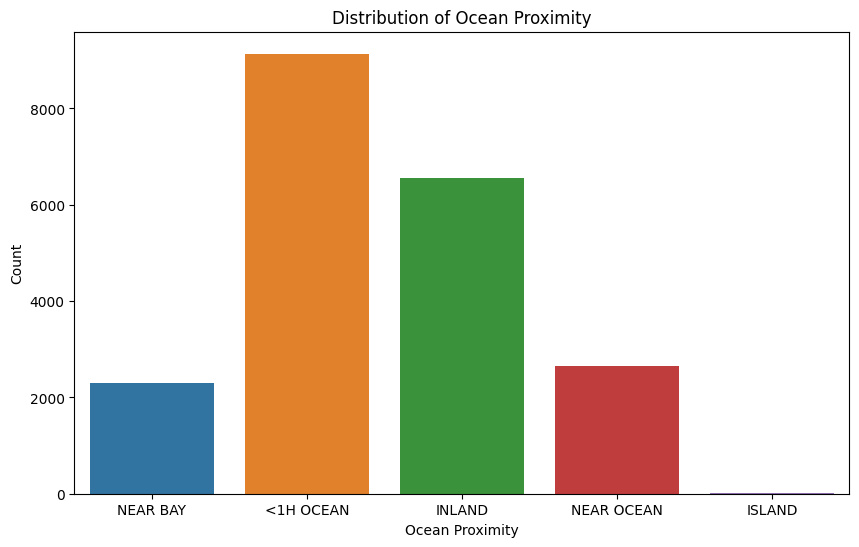

In [94]:
plt.figure(figsize=(10, 6)) 
sns.countplot(data=hsg_data, x='ocean_proximity') #  To visualize the categorical variable (ocean_proximity
plt.xlabel('Ocean Proximity')                     #defining x axis
plt.ylabel('Count')                               #defining y axis
plt.title('Distribution of Ocean Proximity')      #title for the graph
plt.show()

As we observe the dataset, we can categorize the distribution of houses in California into the following groups:

1.The majority of houses** (9136**) are located within a one-hour distance from the ocean **("<1H OCEAN")**.

2.There is a substantial number of houses located **inland (6551)**.

3.A significant number of houses are situated near the** ocean   (2658).**

4.Houses near the** bay (2290)**  are also notable in number.

5.Houses on **islands (5)** are relatively fewer in number.

This categorization provides insights into the distribution patterns of houses in California based on their proximity to different geographical features. 

As the ocean proximity column **categorise** the data **into 5** categories I can say that it is a **nominal data**.

 

In [95]:
hsg_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


* This gives us sorted data of numeric values present in the 
  dataset It gives us the values likes maximum, minimum,mean,etc.of the columns.
  For example; mean of median income is 3.870671,also 25 % of median income is less than 2.563400	etc.


# (Q/A)

# 1. What is the average median income of the data set and check the distribution of data using appropriate plots. Please explain the distribution of the plot.

Average Median Income: 3.8706710029069766


Text(0.5, 1.0, 'Distribution of Median Income')

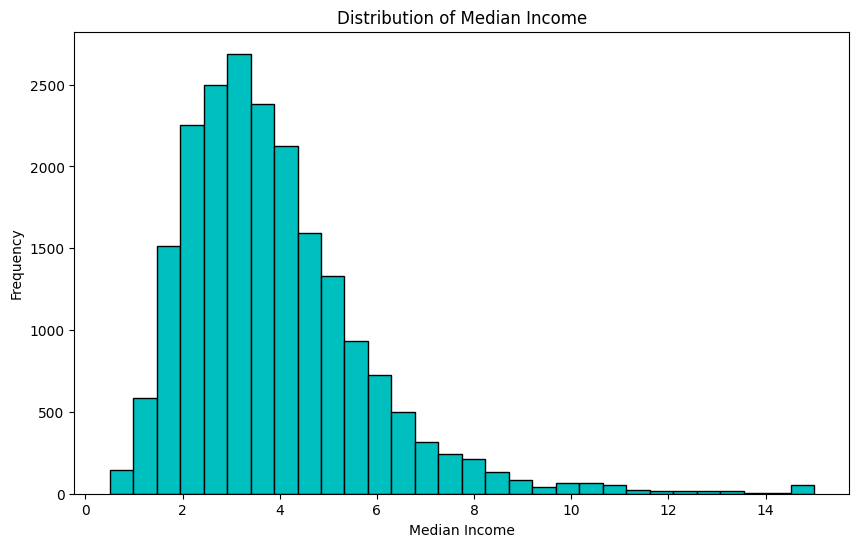

In [96]:
# Calculate the average median income
average_median_income = hsg_data['median_income'].mean()
print("Average Median Income:", average_median_income)

# Plot the distribution of median income
plt.figure(figsize=(10, 6))
plt.hist(hsg_data['median_income'], bins=30, facecolor="c",edgecolor='k')
plt.xlabel('Median Income')                    #defining x axis
plt.ylabel('Frequency')                        #defining y axis
plt.title('Distribution of Median Income')     #title for graph

The code above calculates the average median income (3.8706710029069766) from the dataset and then creates a histogram to visualize the distribution of median income.The salary of people is more or less normally distributed but there is some people getting a high salary.

The distribution of median income appears to be right-skewed, with a peak around the 2 to 4 range. This suggests that the majority of areas in the dataset have relatively lower median incomes, while there are fewer areas with higher median incomes.

# 2. Draw an appropriate plot to see the distribution of housing_median_age and explain your observations.

Text(0.5, 1.0, 'Distribution of Housing Median Age')

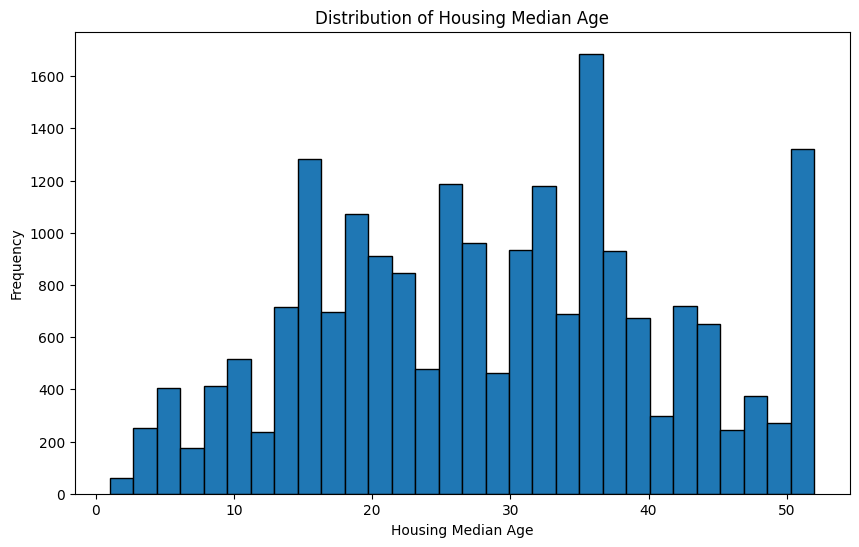

In [97]:
plt.figure(figsize=(10, 6))                        # Plot the distribution of housing median age
plt.hist(hsg_data['housing_median_age'], bins=30,edgecolor='k')
plt.xlabel('Housing Median Age')                   #defining x axis
plt.ylabel('Frequency')                            #defining y axis
plt.title('Distribution of Housing Median Age')    #title of graph

The code above creates a histogram to visualize the distribution of housing median age.
The distribution of housing median age appears to be roughly uniform, with no significant peaks or valleys. This suggests that the ages of houses in the dataset are relatively evenly distributed across different age ranges.The average house age, the distribution is more or less uniform

# 3.Show with the help of visualization, how median_income and median_house_values are related?

Text(0.5, 1.0, 'Median Income vs Median House Value')

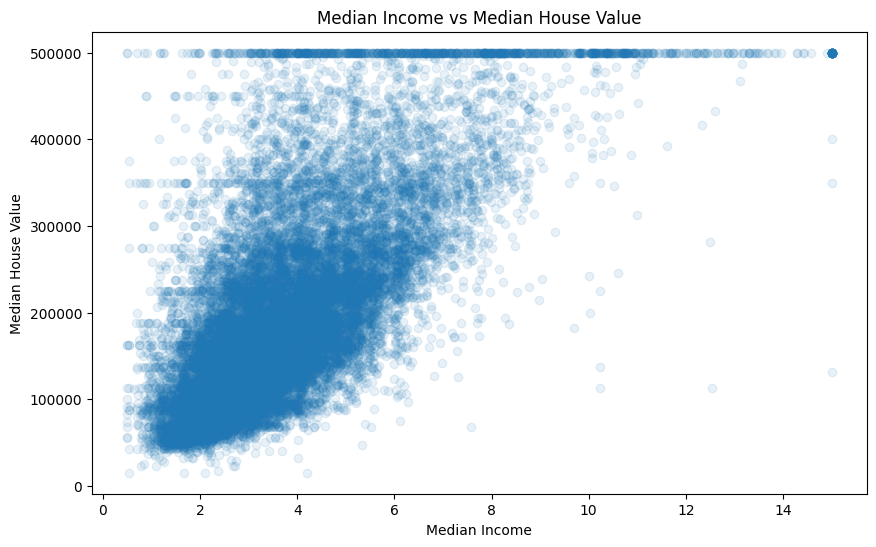

In [98]:
plt.figure(figsize=(10, 6))     # Scatter plot of median_income vs median_house_values
plt.scatter(hsg_data['median_income'], hsg_data['median_house_value'],alpha=0.1)
plt.xlabel('Median Income')                      #defining x axis
plt.ylabel('Median House Value')                  #defining y axis
plt.title('Median Income vs Median House Value')  #title of the graph

The code above creates a scatter plot to visualize the relationship between median income and median house values.
The scatter plot shows the distribution of data points, where each point represents a specific area. From the plot, we can observe a positive correlation between median income and median house values. Generally, as the median income increases, the median house value tends to be higher.

# 4. Create a data set by deleting the corresponding examples from the data set for which total_bedrooms are not available.

In [99]:
#Data cleaning
cleaned_data = hsg_data.dropna(subset=['total_bedrooms']) # Create a new dataset by removing examples with missing total_bedrooms

# Print the cleaned dataset
cleaned_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [100]:
cleaned_data.info()    #post-cleaning data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  int64  
 3   total_rooms         20433 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  int64  
 6   households          20433 non-null  int64  
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  int64  
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.7+ MB


The code above removes the examples from the dataset where the total_bedrooms information is missing and creates a new dataset called "cleaned_data".Here we can see that all the values of column changed from 20640 to 20433.

# 5. Create a data set by filling the missing data with the mean value of the total_bedrooms in the original data set.

In [101]:
# Fill missing values with the mean value of total_bedrooms
filled_data = hsg_data.fillna({'total_bedrooms': hsg_data['total_bedrooms'].mean()}) 


filled_data.head()  # printting the filled dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


The code above fills the missing values in the total_bedrooms column with the mean value of total_bedrooms from the original dataset and creates a new dataset called "filled_data".

#6. Write a programming construct (create a user defined function) to calculate the median value of the data set wherever required.

In [102]:
def calculate_median(data_column):          #function created to calculate the median value
    return data_column.median()

# For examole
median_total_bedrooms = calculate_median(hsg_data['total_bedrooms'])
print("Median Total Bedrooms:", median_total_bedrooms)

Median Total Bedrooms: 435.0


The code above defines a user-defined function called "calculate_median" that takes a data column as input and calculates the median value of that column using the median() function in pandas. The function can be used to calculate the median value of any column in the dataset.

## 7. Plot latitude versus longitude and explain your observations.

Text(0.5, 1.0, 'Latitude vs Longitude')

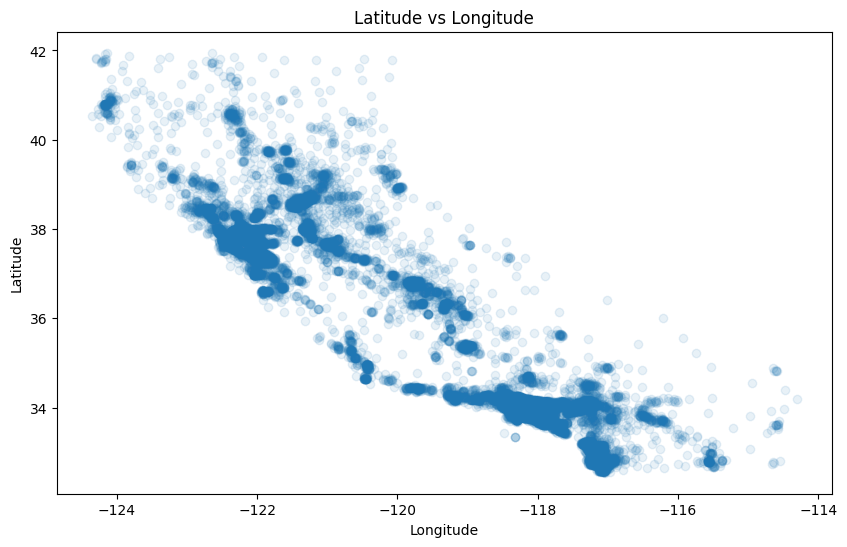

In [103]:
plt.figure(figsize=(10, 6))                               # Scatter plot of latitude vs longitude
plt.scatter(hsg_data['longitude'], hsg_data['latitude'], alpha=0.1)
plt.xlabel('Longitude')                                   #For x axis
plt.ylabel('Latitude')                                    #For y axis
plt.title('Latitude vs Longitude')                        #Title of the graph


The code above creates a scatter plot to visualize the geographical distribution of the data points based on latitude and longitude.

Explanation:
The scatter plot shows the spatial distribution of the data points on a map of California. The plot reveals the shape and orientation of the state, with longitude representing the x-axis (west to east) and latitude representing the y-axis (south to north). The scatter plot helps us visualize the clustering or dispersion of the data points across different regions of California.

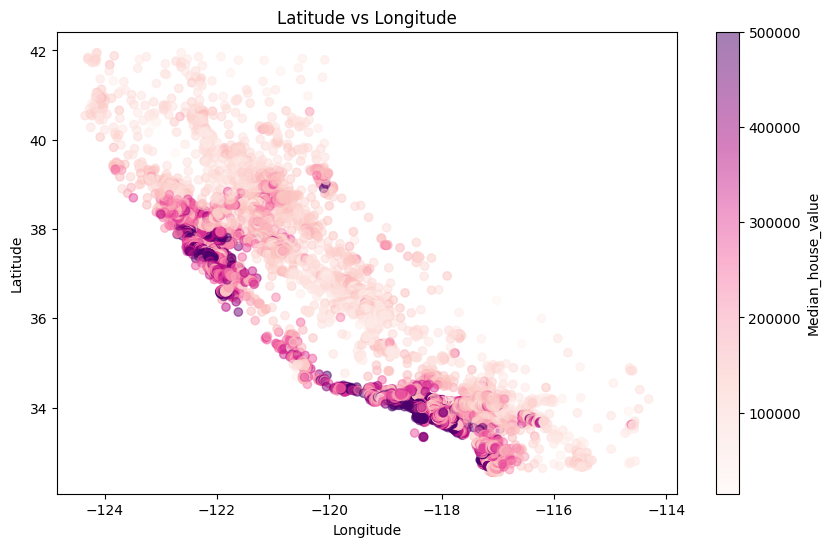

In [104]:
plt.figure(figsize=(10, 6))
plt.scatter(hsg_data['longitude'], hsg_data['latitude'],c=hsg_data['median_house_value'], alpha=0.5,cmap='RdPu')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Latitude vs Longitude')
plt.colorbar(label='Median_house_value')


We can see ,the houses near the ocean generally have higher median values, while inland properties have lower median values. Some coastal areas may have lower prices, and certain inland locations can have higher prices. Proximity to major cities like San Francisco and Los Angeles is associated with higher median house values.

# 8. Create a data set for which the ocean_proximity is ‘Near ocean’.

In [105]:
# Create a new dataset with ocean_proximity as 'Near ocean'
near_ocean_data = hsg_data[hsg_data['ocean_proximity'] == 'NEAR OCEAN']

# Print the new dataset
near_ocean_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1850,-124.17,41.80,16,2739,480.0,1259,436,3.7557,109400,NEAR OCEAN
1851,-124.30,41.80,19,2672,552.0,1298,478,1.9797,85800,NEAR OCEAN
1852,-124.23,41.75,11,3159,616.0,1343,479,2.4805,73200,NEAR OCEAN
1853,-124.21,41.77,17,3461,722.0,1947,647,2.5795,68400,NEAR OCEAN
1854,-124.19,41.78,15,3140,714.0,1645,640,1.6654,74600,NEAR OCEAN


The code above creates a new dataset called "near_ocean_data" that includes only the examples where the ocean_proximity is 'Near ocean'.

# 9. Find the mean and median of the median income for the data set created in question8.


In [106]:
# Calculate the mean and median of median_income in the near_ocean_data dataset
mean_median_income = near_ocean_data['median_income'].mean()
median_median_income = near_ocean_data['median_income'].median()

print("Mean Median Income (Near Ocean):", mean_median_income)
print("Median Median Income (Near Ocean):", median_median_income)

Mean Median Income (Near Ocean): 4.0057848006019565
Median Median Income (Near Ocean): 3.64705


The code above calculates the mean and median of the median_income column is Mean Median Income (Near Ocean) is 4.0057 and Median Median Income (Near Ocean) is 3.64705
 in the near_ocean_data dataset.

# 10. Please create a new column named total_bedroom_size. If the total bedrooms is 10 or less, it should be quoted as small. If the total bedrooms is 11 or more but less than 1000, it should be medium, otherwise it should be considered large.


In [107]:
# Create a new column 'total_bedroom_size' based on total_bedrooms
hsg_data['total_bedroom_size'] = pd.cut(hsg_data['total_bedrooms'], bins=[0, 10, 1000, float('inf')],
                                    labels=['Small', 'Medium', 'Large'], right=False)


hsg_data.head()# printing the updated dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_bedroom_size
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,Medium
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,Large
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,Medium
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,Medium
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,Medium


The code above creates a new column called 'total_bedroom_size' in the dataset, which categorizes the total bedrooms into three size categories: 'Small' (<= 10), 'Medium' (11-999), and 'Large' (>= 1000). The cut() function from pandas is used to bin the total_bedrooms based on the specified bins and labels.



# Conclusion and Summary
From the above analysis I can say that the california's housing prices are affecting by ocean proximity and the median income.The prices of house increase as the ocean proximity is nearer to the ocean.The house in the Inland are relatively fewer as compared to other categories.The average house age, The distribution is more or less uniform 